In [ ]:
import kagglehub
import os

DATASET_PATH = kagglehub.dataset_download("ahmedxc4/skin-ds")
print("Dataset downloaded to:", DATASET_PATH)
print("Contents:", os.listdir(DATASET_PATH))


100%|██████████| 9.25G/9.25G [01:43<00:00, 96.2MB/s]

Extracting files...


Dataset downloaded to: /root/.cache/kagglehub/datasets/ahmedxc4/skin-ds/versions/2
Contents: ['train', 'README.md', 'val', 'test']


In [ ]:
for root, dirs, files in os.walk(DATASET_PATH):
    if "train" in dirs and "val" in dirs:
        print("✅ Dataset root found:", root)
        BASE_PATH = root
        break


✅ Dataset root found: /root/.cache/kagglehub/datasets/ahmedxc4/skin-ds/versions/2


In [ ]:
print("Train classes:", os.listdir(os.path.join(BASE_PATH, "train"))[:5])
print("Val classes:", os.listdir(os.path.join(BASE_PATH, "val"))[:5])
print("Test classes:", os.listdir(os.path.join(BASE_PATH, "test"))[:5])


Train classes: ['Basal cell carcinoma', 'Chickenpox', 'Benign keratosis-like lesions', 'Measles', 'Melanocytic nevi']
Val classes: ['Basal cell carcinoma', 'Chickenpox', 'Benign keratosis-like lesions', 'Measles', 'Melanocytic nevi']
Test classes: ['Basal cell carcinoma', 'Chickenpox', 'Benign keratosis-like lesions', 'Measles', 'Melanocytic nevi']


In [ ]:
!pip install ultralytics


In [ ]:
from ultralytics import YOLO
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
model = YOLO("yolov8n-cls.pt")


In [ ]:
results = model.train(
    data=BASE_PATH,
    epochs=10,
    imgsz=128,
    batch=16,
    optimizer="Adam",
    lr0=1e-4,
    device=0   # use "cpu" if needed
)


Ultralytics 8.3.240 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/root/.cache/kagglehub/datasets/ahmedxc4/skin-ds/versions/2, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=128, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.0001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n-cls.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=Adam, overlap_mask=True, patience=100, p

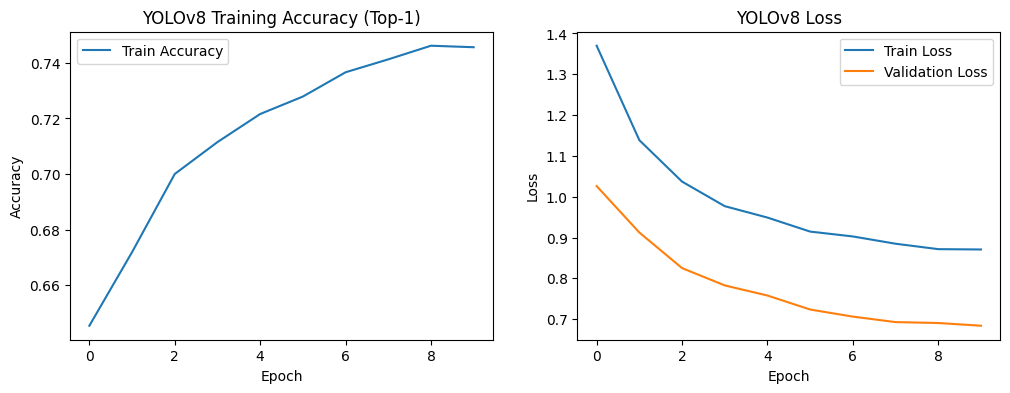

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))

# Accuracy (Top-1)
plt.subplot(1,2,1)
plt.plot(df["metrics/accuracy_top1"], label="Train Accuracy")
plt.title("YOLOv8 Training Accuracy (Top-1)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(df["train/loss"], label="Train Loss")
plt.plot(df["val/loss"], label="Validation Loss")
plt.title("YOLOv8 Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()


In [ ]:
metrics = model.val(
    data=BASE_PATH,
    split="val"
)

print("Validation Top-1 Accuracy:", metrics.top1)
print("Validation Top-5 Accuracy:", metrics.top5)


Ultralytics 8.3.240 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-cls summary (fused): 30 layers, 1,452,814 parameters, 0 gradients, 3.3 GFLOPs
train: /root/.cache/kagglehub/datasets/ahmedxc4/skin-ds/versions/2/train... found 29322 images in 14 classes ✅ 
val: /root/.cache/kagglehub/datasets/ahmedxc4/skin-ds/versions/2/val... found 3660 images in 14 classes ✅ 
test: /root/.cache/kagglehub/datasets/ahmedxc4/skin-ds/versions/2/test... found 3674 images in 14 classes ✅ 
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2036.1±810.6 MB/s, size: 236.1 KB)
val: Scanning /root/.cache/kagglehub/datasets/ahmedxc4/skin-ds/versions/2/val... 3660 images, 0 corrupt: 100% ━━━━━━━━━━━━ 3660/3660 6.9Mit/s 0.0s
               classes   top1_acc   top5_acc: 100% ━━━━━━━━━━━━ 229/229 7.1it/s 32.1s
                   all      0.746       0.99
Speed: 0.0ms preprocess, 0.6ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to /content/runs/classify/val
Validation Top

In [ ]:
test_metrics = model.val(
    data=BASE_PATH,
    split="test"
)

print("Test Top-1 Accuracy:", test_metrics.top1)
print("Test Top-5 Accuracy:", test_metrics.top5)


Ultralytics 8.3.240 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
train: /root/.cache/kagglehub/datasets/ahmedxc4/skin-ds/versions/2/train... found 29322 images in 14 classes ✅ 
val: /root/.cache/kagglehub/datasets/ahmedxc4/skin-ds/versions/2/val... found 3660 images in 14 classes ✅ 
test: /root/.cache/kagglehub/datasets/ahmedxc4/skin-ds/versions/2/test... found 3674 images in 14 classes ✅ 
test: Fast image access ✅ (ping: 0.0±0.0 ms, read: 54.4±28.8 MB/s, size: 236.5 KB)
test: Scanning /root/.cache/kagglehub/datasets/ahmedxc4/skin-ds/versions/2/test... 3674 images, 0 corrupt: 100% ━━━━━━━━━━━━ 3674/3674 783.4it/s 4.7s
test: New cache created: /root/.cache/kagglehub/datasets/ahmedxc4/skin-ds/versions/2/test.cache
               classes   top1_acc   top5_acc: 100% ━━━━━━━━━━━━ 230/230 7.0it/s 32.8s
                   all      0.756       0.99
Speed: 0.0ms preprocess, 0.6ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to /content/runs/classify/val2
Te